> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset about movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

This data set contains information about 10865 thousand movies collected from The Movie Database (TMDb), 
It consist of 21 columns such as user ratings , revenue ,imdb_id, revenue, budget, vote_count etc.

Questions:
    
Question 1: What are the Movies with highest and lowest budget?
Question 2: What are the Movies with highest and lowest revenue?
Question 3: What are the Movies with highest and lowest profit?
Question 4: What are the Movies with longest and shortest runtime?
Question 5: What are the runtime values associated with movies that have high profitability?
Question 6: What are the Frequently used Genres in movie making?
Question 7: Which movie has highest profitability in the released year?



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
#load data
movie_db=pd.read_csv('tmdb-movies.csv')
rows , col=movie_db.shape
print('Number of rows: {} , number of Col: {}'.format(rows-1,col))
#printing first five rows
movie_db.head()

Number of rows: 10865 , number of Col: 21


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Cleaning 

In [4]:
#data wranglining
#1. delete unused col 
unused_col = ['id', 'imdb_id','popularity','cast','keywords','homepage','director','tagline','overview','production_companies','vote_count','budget_adj','revenue_adj']
movie_db=movie_db.drop(unused_col,1)
row ,col=movie_db.shape
print('Number of col {} after removing unused col:'.format(col))
movie_db.head()

Number of col 8 after removing unused col:


,budget,revenue,original_title,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,7.3,2015


In [5]:
#2 delete zero values
movie_db = movie_db[(movie_db['budget'] > 0) & (movie_db['revenue'] > 0) & (movie_db['runtime'] > 0)]
row, col= movie_db.shape
print('Number of rows: {} and col : {} after deleting zero values'.format(row-1, col))

Number of rows: 3854 and col : 8 after deleting zero values


In [6]:
#3 Remove duplicate values
row, col=movie_db.drop_duplicates(keep='first').shape
print('Number of rows: {} after deleting duplicate values'.format(row-1))

Number of rows: 3853 after deleting duplicate values


In [7]:
#4 checking the data type in the data set
movie_db.dtypes

budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_average      float64
release_year        int64
dtype: object

In [8]:

#5 and change the format of release_year
movie_db.release_date = pd.to_datetime(movie_db['release_date'])
movie_db.dtypes



budget                     int64
revenue                    int64
original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

In [9]:
#6 calculate  profit by subtracting the budget from the revenue

profit=(movie_db['revenue']-movie_db['budget'])
# store the profit values in a new col 
movie_db.insert(3,'profit',profit)
movie_db.head()

,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,1363528810,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,228436354,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,110000000,295238201,Insurgent,185238201,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,1868178225,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,190000000,1506249360,Furious 7,1316249360,137,Action|Crime|Thriller,2015-04-01,7.3,2015


# Exploratory Data Analysis



## Research Question 1:  Movies with highest and lowest budget

In [12]:
#finding highest budget
max_budget=movie_db[movie_db['budget']== movie_db['budget'].max()]
print('Highest budget:')
max_budget

Highest budget:


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
2244,425000000,11087569,The Warrior's Way,-413912431,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,6.4,2010


In [13]:
#finding lowest budget
min_budget=movie_db[movie_db['budget']== movie_db['budget'].min()]
print('Lowest budget:')
min_budget

Lowest budget:


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
2618,1,100,Lost & Found,99,95,Comedy|Romance,1999-04-23,4.8,1999
3581,1,1378,"Love, Wedding, Marriage",1377,90,Comedy|Romance,2011-06-03,5.3,2011


## Research Question 2:  Movies with highest and lowest revenue

In [16]:
# finding highest revenue
max_revenue=movie_db[movie_db['revenue']== movie_db['revenue'].max()]
print('Highest revenue:')
max_revenue


Highest revenue:


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
1386,237000000,2781505847,Avatar,2544505847,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009


In [17]:
#finding lowest revenue
min_revenue=movie_db[movie_db['revenue']== movie_db['revenue'].min()]
print('lowest revenue:')
min_revenue

lowest revenue:


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
5067,6000000,2,Shattered Glass,-5999998,94,Drama|History,2003-11-14,6.4,2003
8142,6000000,2,Mallrats,-5999998,94,Romance|Comedy,1995-10-20,6.8,1995


## Research Question 3:  Movies with highest and lowest profit

In [18]:
#finding max profit
max_profit=movie_db[movie_db['profit']== movie_db['profit'].max()]
print('Highest profit:')
max_profit

Highest profit:


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
1386,237000000,2781505847,Avatar,2544505847,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009


In [19]:
# finding min profit
min_profit=movie_db[movie_db['profit']== movie_db['profit'].min()]
print('lowest profit:')
min_profit

lowest profit:


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
2244,425000000,11087569,The Warrior's Way,-413912431,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,6.4,2010


## Research Question 4:  Movies with longest and shortest runtime

In [20]:
#finding longest runtime
long_runtime=movie_db[movie_db['runtime']== movie_db['runtime'].max()]
print('longest runtime :')
long_runtime

longest runtime :


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
2107,18000000,871279,Carlos,-17128721,338,Crime|Drama|Thriller|History,2010-05-19,6.2,2010


In [21]:
#finding shortest runtime
shortest_runtime=movie_db[movie_db['runtime']== movie_db['runtime'].min()]
print('shortest runtime :')
shortest_runtime

shortest runtime :


,budget,revenue,original_title,profit,runtime,genres,release_date,vote_average,release_year
5162,10,5,Kid's Story,-5,15,Science Fiction|Animation,2003-06-02,6.8,2003


## Research Question 5: runtime values vs  movies profitability

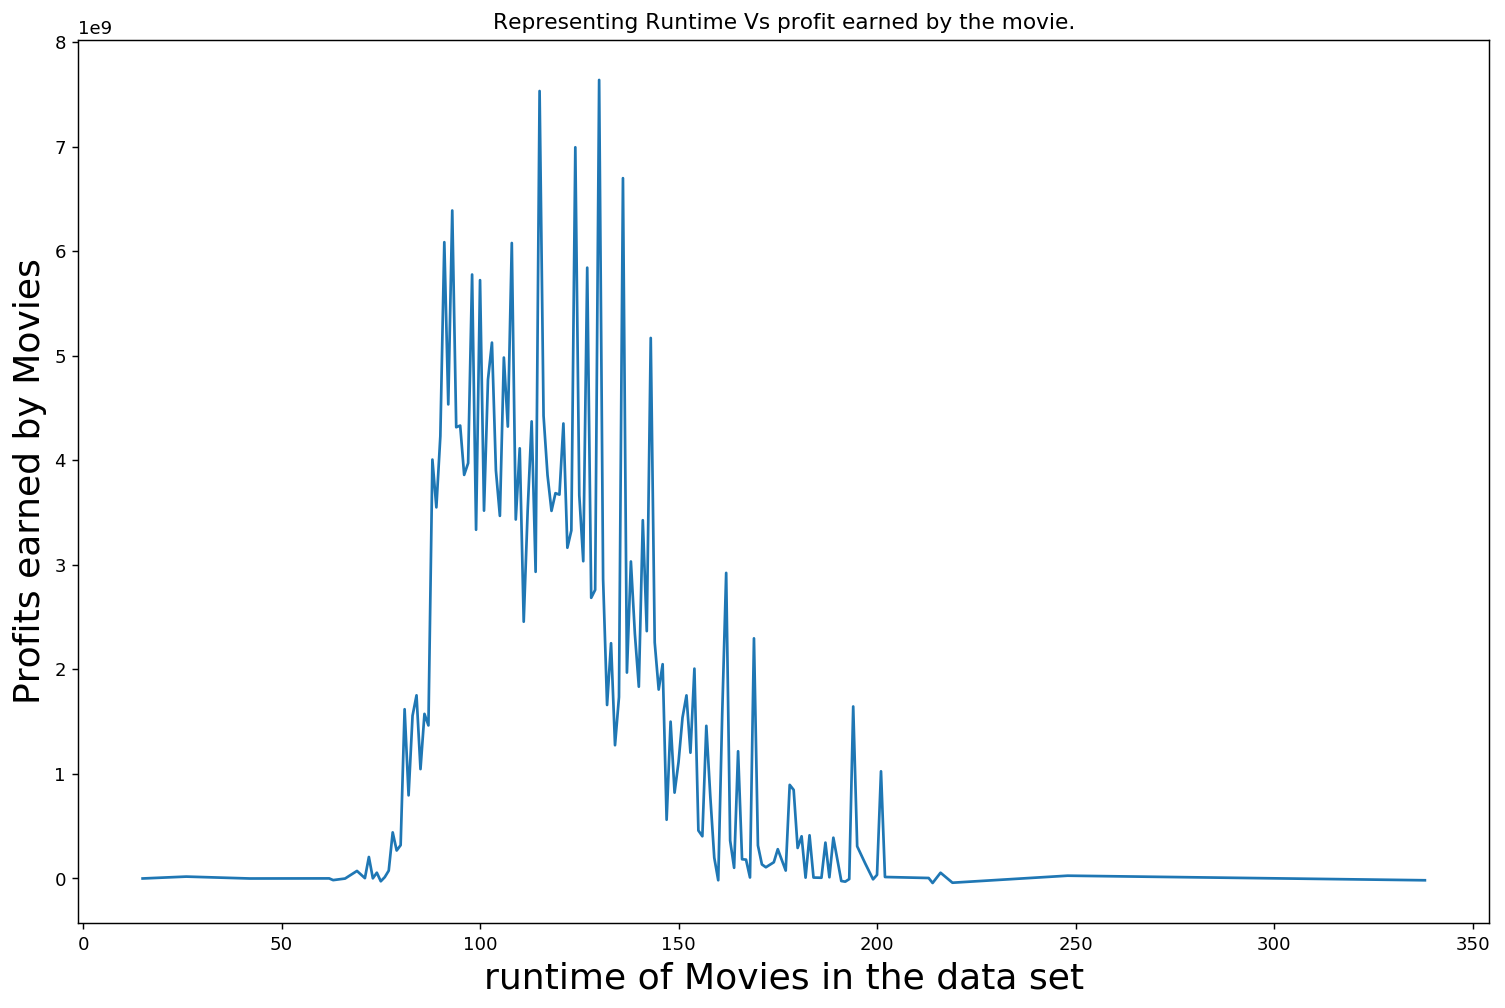

In [22]:
profits_runtime = movie_db.groupby('runtime')['profit'].sum()
#figure size(width, height)
plt.figure(figsize=(14,9), dpi = 130)

#on x-axis
plt.xlabel('runtime of Movies in the data set', fontsize = 20)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 20)
plt.title('Representing Runtime Vs profit earned by the movie.')

plt.plot(profits_runtime)
plt.show()



In [23]:
#highest movie profit runtime 
profits_runtime.idxmax()

130

As it is shown the runtime associated with the movie with the highest profit is 130 minutes.




## Research Question 6: Frequently used Genres in movie making

In [24]:
def gen_sep(col):
    
#function to seperate strings in genres 
    gen = movie_db[col].str.cat(sep = '|')
   
    num_gen = (pd.Series(gen.split('|'))).value_counts(ascending = False)
    
    return num_gen

In [25]:
#store genres
gen_types = gen_sep('genres')
#display types of genres 
gen_types.head()

Drama        1757
Comedy       1358
Thriller     1205
Action       1086
Adventure     749
dtype: int64

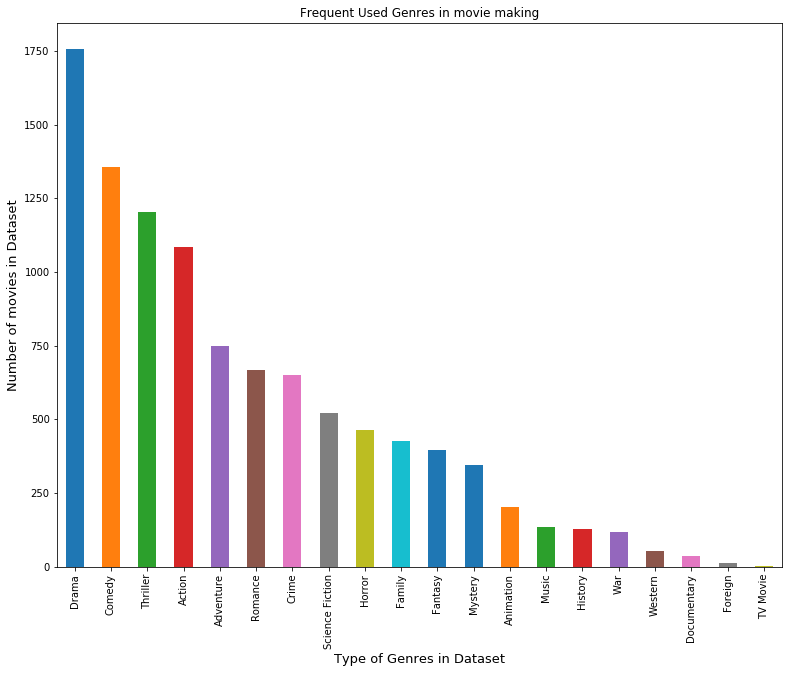

In [26]:
#ploting
gen_types.sort_values(ascending = False, inplace = True)
Genr_bar = gen_types.plot(kind='bar', figsize=(16, 8))

#title
Genr_bar.set(title = 'Frequent Used Genres in movie making')


Genr_bar.set_xlabel('Type of Genres in Dataset', color = 'black', fontsize = '13')
Genr_bar.set_ylabel('Number of movies in Dataset', color = 'black', fontsize = '13')
Genr_bar.figure.set_size_inches(13, 10)

#ploting the graph
plt.show()

The frequently used Genres are: Drama , comedy , thriller , action

## Research Question 7: realese year vs profitlibly

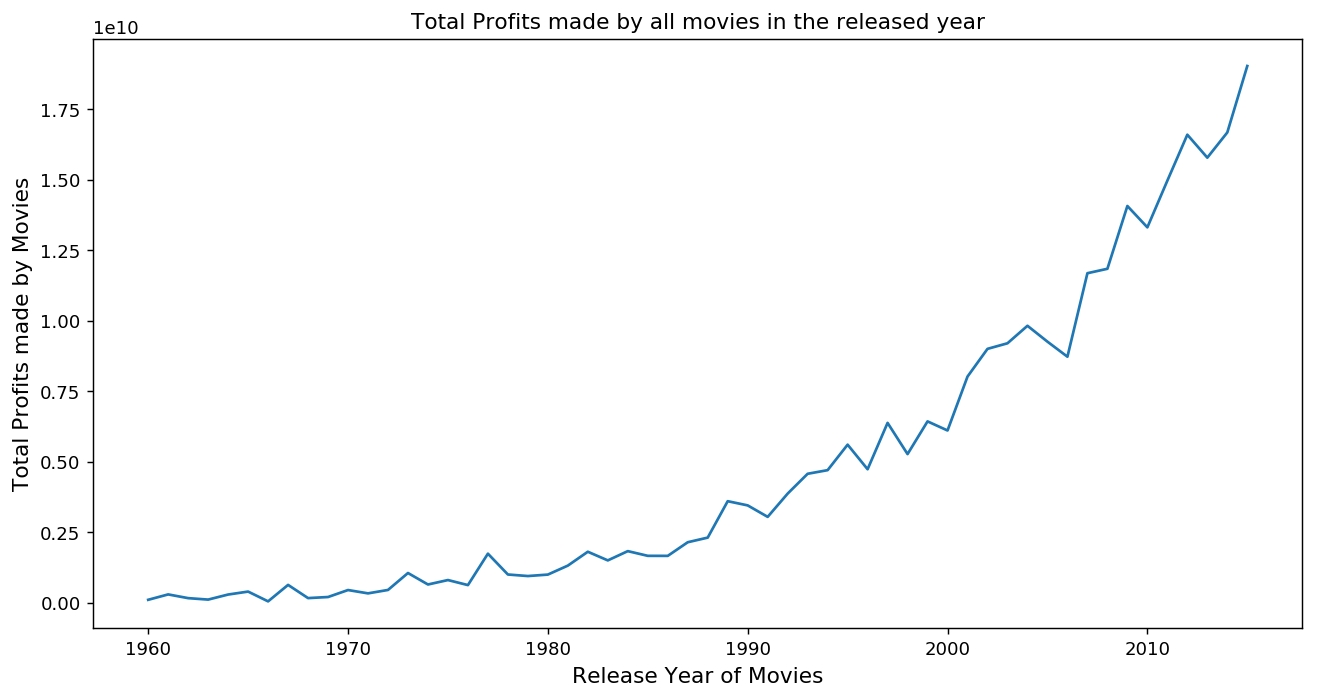

In [31]:
profits_year = movie_db.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Total Profits made by Movies', fontsize = 12)
plt.title('Total Profits made by all movies in the released year')
plt.plot(profits_year)

plt.show()

In [32]:
profits_year.idxmax()

2015

values in the y-axis are being multiplied by '1e10' because the value of the profits are too high
The year 2015, shows us the highest peak, it is the highest profit value.

## Conclusions

Findings:
its shown that the movies profit has peaked in the year 2015 and it shows that most movies with very high budget couldnt increase their profitiblity and the most sucessfull genres are action , adventure , thriller ,comdey and drama. 

Recommendations for movies to be successful:
1- movie duration recommended : around 130 minutes
2- Genres recommended : 1-Drama, 2-Comedy 3-Thriller 4-Action 5-Adventure

Limitations: 
1-Currency unit is not provided in the budget and revenue column.
2-the whole anaylsis may be affected by dropping the rows with missing values.